APLICANDO CÓDIGO DE CLASE
Se utiliza de codigo guía el cuadernillo de drive denominado (01 redes_neuronales_01.ipynb del enlace de drive provisto)

Se importan solo las librerias necesarias para esta sección del ejercicio (sin pytorch)

In [271]:
import os
import numpy as np
from matplotlib import pyplot
from scipy import optimize
%matplotlib inline
import pandas as pd

In [272]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [273]:
import sys
sys.path.append('/content/drive/MyDrive')
import utils

Importamos los datos a la variable data y la segmentamos en x y y de acuerdo al estudio previo del dataset y visualizamos los datos en forma de imagen

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[5 0 4 ... 5 6 8]


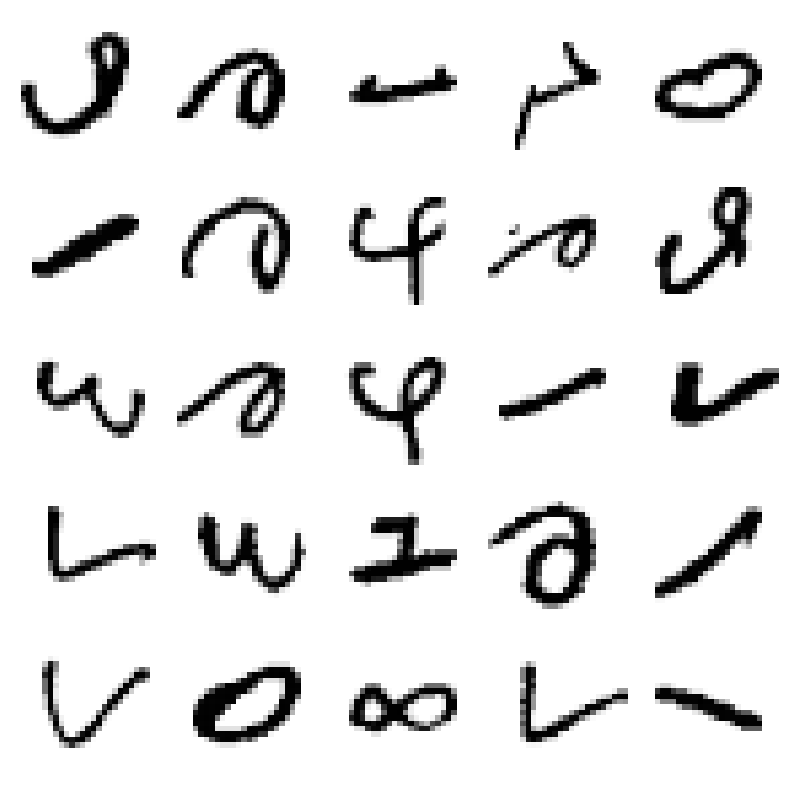

In [274]:
data = pd.read_csv("/content/drive/MyDrive/mnist_train.csv")
data = np.array(data)
x = data[:,1:]
y = data[:,0]

y[y == 10] = 0

m = y.size
print (x)
print (y)
indices = np.random.permutation(m)
rand_indices = np.random.choice(m, 25, replace=False)
sel = x[rand_indices, :]
utils.displayData(sel)

Establecemos los parametros de la red neuronal, como el tamaño de la capa de entrada, las capas ocultas y el número de clases

In [275]:
input_layer_size  = 784  # Entradas de x de 784
hidden_layer_size = 10   # 10 unidades ocultas
num_labels = 10          # 10 etiquetas, del 1 al 10 (se remapea el numero 10 con el valor de 0)

weights = {}

weights['Theta1'] = np.random.rand(hidden_layer_size, input_layer_size + 1)
weights['Theta2'] = np.random.rand(num_labels, hidden_layer_size + 1)

Theta1, Theta2 = weights['Theta1'], weights['Theta2']

print(Theta1.ravel().shape)
print(Theta2.ravel().shape)

nn_params = np.concatenate([Theta1.ravel(), Theta2.ravel()])
print(nn_params.shape)

(7850,)
(110,)
(7960,)


In [276]:
def predict(Theta1, Theta2, x):
    if x.ndim == 1:
        x = x[None]

    m = x.shape[0]
    num_labels = Theta2.shape[0]

    p = np.zeros(x.shape[0])

    x = np.concatenate([np.ones((m, 1)), x], axis=1)

    a2 = utils.sigmoid(x.dot(Theta1.T))
    a2 = np.concatenate([np.ones((a2.shape[0], 1)), a2], axis=1)

    a3 = utils.sigmoid(a2.dot(Theta2.T))
    # a2 = np.concatenate([np.ones((a2.shape[0], 1)), a2], axis=1)


    # p = np.argmax(sigmoid(a2.dot(Theta2.T)), axis = 1)
    p = np.argmax(a3, axis = 1)
    return p

Corroboramos la efectividad del mismo a través de un promedio entre el valor real y el obtenido por el modelo entrenado

In [277]:
pred = predict(Theta1, Theta2, x)
print(len(pred))
print('El error del conjunto de entrenamiento: {:.1f}%'.format(np.mean(pred == y) * 100))

60000
El error del conjunto de entrenamiento: 11.2%


Predicción de la red neuronal: 1


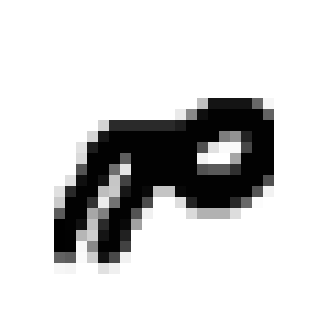

In [278]:
indices = np.random.permutation(m)

if indices.size > 0:
    i, indices = indices[0], indices[1:]
    utils.displayData(x[i, :], figsize=(4, 4))
    pred = predict(Theta1, Theta2, x[i, :])
    print('Predicción de la red neuronal: {}'.format(*pred))
else:
    print('No hay mas imagenes para mostrary!')

APLICANDO PYTORCH

Se importan las librerias para esta sección (pytorch)

In [309]:
import torch
from torch import optim
from torch import nn
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import torchvision.datasets as datasets
from tqdm import tqdm

Se define la clase de la red neuronal

In [310]:
class RedNeuronalMLS(nn.Module):
    def __init__(self, input_size, num_classes):
        super(RedNeuronalMLS, self).__init__()
        self.fc1 = nn.Linear(input_size, 50)
        self.fc2 = nn.Linear(50, num_classes)

    def forward(self, x):

        x = self.fc1(x)
        x = F.sigmoid(x)
        # x = F.sigmoid(self.fc1(x))
        x = self.fc2(x)
        return x

Definimos los parametros para el funcionamiento del modelo, que son las entradas, el número de clases, el coeficiente de aprendizaje, la longitud de los "batches" y la cantidad de iteraciones

In [311]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

input_size = 784
num_classes = 10
learning_rate = 0.001
batch_size = 10000
num_epochs = 3

cpu


Importamos el dataset propio en las variables de entrenamiento y prueba previamente organizados en la carpeta a las que hace referencia las líneas de código

In [329]:
train_dataset = datasets.MNIST(root="/content/drive/MyDrive", train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root="/content/drive/MyDrive", train=False, transform=transforms.ToTensor(), download=True)
print(len(train_dataset))
print(len(test_dataset))

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 19197381.37it/s]


Extracting /content/drive/MyDrive/MNIST/raw/train-images-idx3-ubyte.gz to /content/drive/MyDrive/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 561114.74it/s]


Extracting /content/drive/MyDrive/MNIST/raw/train-labels-idx1-ubyte.gz to /content/drive/MyDrive/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 5510788.99it/s]


Extracting /content/drive/MyDrive/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/drive/MyDrive/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 8986098.48it/s]


Extracting /content/drive/MyDrive/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/drive/MyDrive/MNIST/raw

60000
10000


In [330]:
model = RedNeuronalMLS(input_size=input_size, num_classes=num_classes).to(device)

In [331]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [332]:
for epoch in range(num_epochs):
    for batch_idx, (data, targets) in enumerate(tqdm(train_loader)):
        data = data.to(device=device)
        targets = targets.to(device=device)

        data = data.reshape(data.shape[0], -1)
        print(data.shape)
        scores = model(data)
        loss = criterion(scores, targets)

        optimizer.zero_grad()
        loss.backward()

        optimizer.step()

 17%|█▋        | 1/6 [00:01<00:06,  1.21s/it]

torch.Size([10000, 784])


 33%|███▎      | 2/6 [00:02<00:04,  1.22s/it]

torch.Size([10000, 784])


 50%|█████     | 3/6 [00:03<00:04,  1.34s/it]

torch.Size([10000, 784])


 67%|██████▋   | 4/6 [00:05<00:02,  1.28s/it]

torch.Size([10000, 784])


 83%|████████▎ | 5/6 [00:06<00:01,  1.30s/it]

torch.Size([10000, 784])


100%|██████████| 6/6 [00:07<00:00,  1.28s/it]


torch.Size([10000, 784])


 17%|█▋        | 1/6 [00:01<00:05,  1.18s/it]

torch.Size([10000, 784])


 33%|███▎      | 2/6 [00:03<00:06,  1.73s/it]

torch.Size([10000, 784])


 50%|█████     | 3/6 [00:05<00:05,  1.76s/it]

torch.Size([10000, 784])


 67%|██████▋   | 4/6 [00:06<00:03,  1.53s/it]

torch.Size([10000, 784])


 83%|████████▎ | 5/6 [00:07<00:01,  1.43s/it]

torch.Size([10000, 784])


100%|██████████| 6/6 [00:08<00:00,  1.49s/it]


torch.Size([10000, 784])


 17%|█▋        | 1/6 [00:01<00:06,  1.30s/it]

torch.Size([10000, 784])


 33%|███▎      | 2/6 [00:02<00:04,  1.23s/it]

torch.Size([10000, 784])


 50%|█████     | 3/6 [00:03<00:03,  1.23s/it]

torch.Size([10000, 784])


 67%|██████▋   | 4/6 [00:04<00:02,  1.23s/it]

torch.Size([10000, 784])


 83%|████████▎ | 5/6 [00:06<00:01,  1.37s/it]

torch.Size([10000, 784])


100%|██████████| 6/6 [00:08<00:00,  1.40s/it]

torch.Size([10000, 784])


Finalmente, realizamos la prueba del modelo para obtener el porcetnaje de aproximación

In [286]:
def check_accuracy(loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()

    predicciones = []
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device)
            y = y.to(device=device)
            x = x.reshape(x.shape[0], -1)

            scores = model(x)
            _, predictions = scores.max(1)
            predicciones.append(predictions)

            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)

    model.train()
    return num_correct/num_samples, predicciones

p_train, pred_train  = check_accuracy(train_loader, model)
p_test, pred_test  = check_accuracy(test_loader, model)

print(f"Accuracy on training set: {p_train*100:.2f}")
print(f"Accuracy on test set: {p_test*100:.2f}")

Accuracy on training set: 54.31
Accuracy on test set: 54.95
